# Q4. Denoising Using L2-Regularisation

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [12,6]

## Importing and Visualizing input image

(2000, 1500, 3)


Text(0.5, 1.0, 'Original Image')

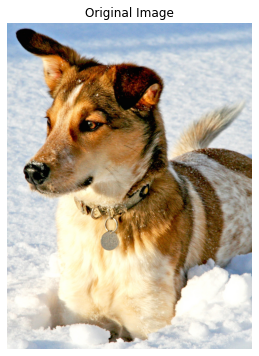

In [2]:
Oimg = imread('dog.jpg')
print(Oimg.shape)
img = plt.imshow(Oimg)
plt.axis('off')
img.set_cmap('gray')
plt.title("Original Image")

In [3]:
Oimg = np.mean(Oimg,-1)                 # Converting to Grayscale

## Adding Gaussian Noise

In [4]:
mean = 0
sigma = 3

Noise = np.random.normal(mean, sigma, (Oimg.shape[0],Oimg.shape[1])).astype('uint8')
OimgNoisey = Oimg + Noise           # Add some noise


## Visualizing Noise and original image

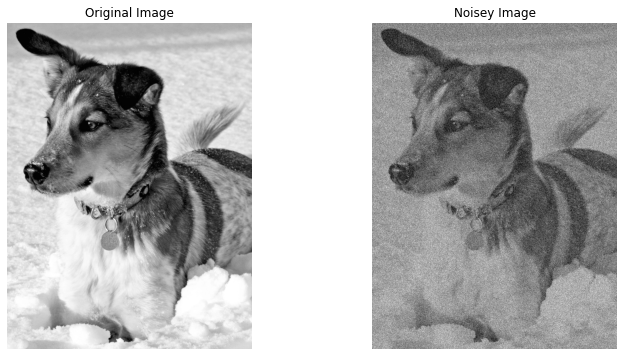

In [5]:

plt.figure(1)
plt.subplot(121)
img = plt.imshow(Oimg)
plt.axis('off')
img.set_cmap('gray')
plt.title("Original Image")

plt.subplot(122)
img2 = plt.imshow(OimgNoisey)
plt.axis('off')
img2.set_cmap('gray')
plt.title("Noisey Image")
plt.show()

## L2-regularisation Function

In [6]:
def L2Regularisation(NoiseyInput, ExpectedOutput,factor):
    
    n = len(ExpectedOutput)
    I = np.identity(n)
    A = I
    At = A.T
    AtA = np.matmul(At,A)
    M = (AtA - factor*I)

    T = np.matmul(np.linalg.inv(M),At)
    pred = np.matmul(T,NoiseyInput)
    
    plt.figure()
    plt.subplot(131)
    img1 = plt.imshow(NoiseyInput)
    img1.set_cmap('gray')
    plt.axis('off')
    plt.title(f'Noisey Image')
    
    plt.subplot(132)
    img2 = plt.imshow(pred)
    img2.set_cmap('gray')
    plt.axis('off')
    plt.title(f'Denoised Image (lambda = {factor})')
    
    plt.subplot(133)
    img3 = plt.imshow(ExpectedOutput)
    img3.set_cmap('gray')
    plt.axis('off')
    plt.title('Original Image')
    plt.show()

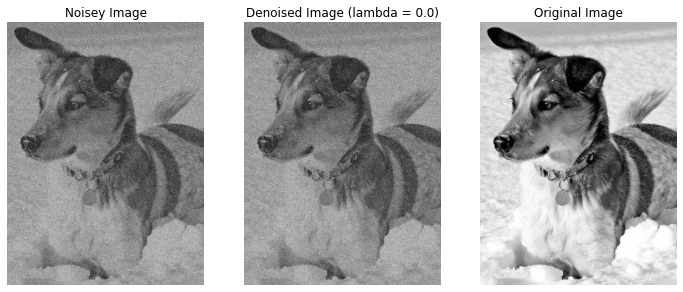

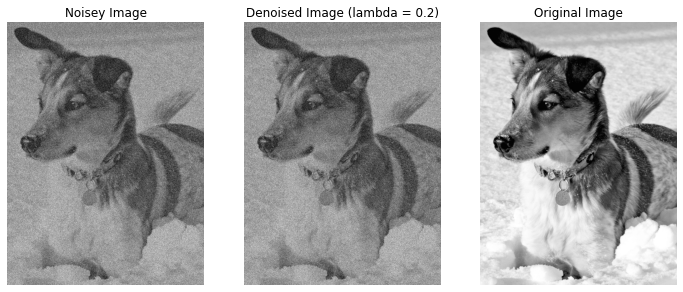

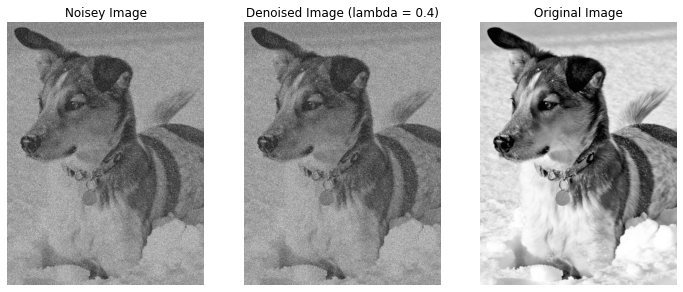

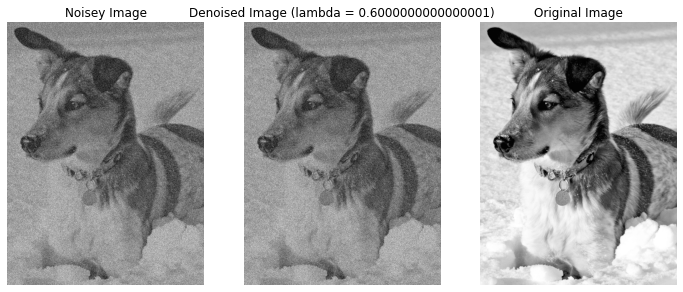

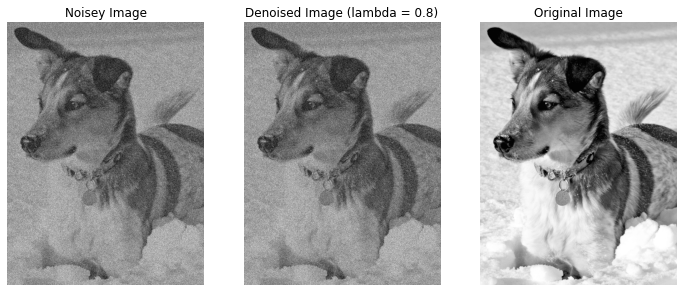

In [7]:
fact = np.arange(0,1,0.2)
for i in fact:
    L2Regularisation(OimgNoisey,Oimg,i)